# Comparative Analysis of ARIMA, ANN and SVR (SC2)
###### Scenario 2 (SC2) contains hourly time-steps input data of the energy consumption for electric water boilers of 67 apartment daily consumption.

### Introduction 
In this study, a comparative analysis of machine learning models was conducted for the prediction and forecasting of EWBs energy consumption, using a dataset from 67 apartments as a case study. Subsequently, the input data was categorized into five distinct scenarios, serving as inputs to ANN, SVR, and ARIMA models to simulate their prediction and forecasting capabilities, evaluated using performance metrics presented in subsequent sections.

Scenario one will be used throughout this report for implementation, while the other scenarios will remain commented in the code and can be uncommented for estimation as needed. Figure 1 illustrates the implementation of this methodology.

<center>
<figure>
  <img src="method.jpg" width="70%" height="70%">
  <figcaption><i> Figure 1: Comparative analysis methodology </i></figcaption>
</figure>
</center>

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.colors as mcolors
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score
from matplotlib.pyplot import rc
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf
import time


### Loading data time steps and data structuring for model application and visualisation ####

In [3]:
# Secanrio data 
flowload_data = pd.read_csv('electric_onehour.csv')  # hourly consumption data of 1houur timestamp


# mean of the apartments as input
sample_data = flowload_data.iloc[:, -1] # 


total_time_len_day = 24 * 7   # Number of days of prediction hourly


length_of_predict = 24  # Number of future prediction (hour) /onehour 


# data normalisation and training 
datainf = flowload_data.iloc[:, -1].values  


datainf = datainf / np.max(datainf)


data_pass_to = [None, total_time_len_day, length_of_predict]
actual = datainf[:total_time_len_day + length_of_predict]


split_size = int(0.8 * len(flowload_data))


train_data = datainf[:split_size]
test_data = datainf[split_size:]

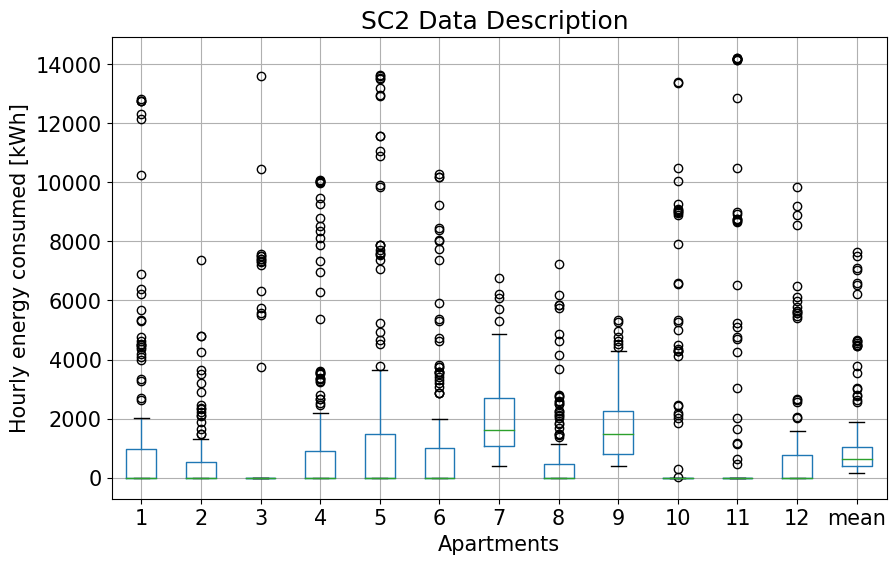

In [8]:
#  Data description visualisation plots
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv("electric_onehour.csv")

df_selected = df[:168] # training duration

# Directly rename the columns
df_selected.columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean']
#df_selected.set_axis(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'mean'], axis='columns', inplace=True)


# visualisation 
rc('font', **{'size' : 15})
plt.figure(figsize=(10, 6)) 
df_selected.boxplot()  
plt.title('SC2 Data Description ')
#plt.xticks(rotation=45)  
plt.xlabel('Apartments')
plt.ylabel('Hourly energy consumed [kWh]')
plt.savefig('sc2_des.jpg')
plt.show()



#### Data Description of  other 4 secanrios, 
- Scenario 2 (SC2) as represent in figure 2, scenario 3 (SC3) as figure 3, scenario 4 (SC4) as figure 4, and scenario 5 (SC5) as  figure 5 respectively. the figures shoes the data descrpition of the data input time steps and means of the energy consumption for EWBs of 67 apartments. SC1 will be used for codel implememtataion other scenarios will be commented out while, other scenario codes are commented as below.

- Scenario 2 (SC2)

<center>
<figure>
  <img src="sc2_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 2: Scenario 2 (SC2) data description </i></figcaption>
</figure>
</center>


- Scenario 3 (SC3)

<center>
<figure>
  <img src="sc3_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 3: Scenario 3 (SC3) data description </i></figcaption>
</figure>
</center>


- Scenario 4 (SC4)

<center>
<figure>
  <img src="sc4_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 4: Scenario 4 (SC4) data description </i></figcaption>
</figure>
</center>


- Scenario 5 (SC5)

<center>
<figure>
  <img src="sc5_des.jpg" width="70%" height="70%">
  <figcaption><i> Figure 6: Scenario 5 (SC5) data description </i></figcaption>
</figure>
</center>


#### ARIMA forecasting and prediction model development

In [10]:
#### ARIMA forecast and Prediction model development and analysis 


#Computational time cost 
start_time_arima_p = time.time()
start_time_arima_r = time.time()

def arima_process(data, nhours, predict_len):
  
   
    kndata = data[:nhours]
    ukndata = data[nhours:nhours + predictlen]

    # Fitting the ARIMA model
    model = ARIMA(kndata, order=(3, 1, 0))
    fitted_model = model.fit()
    
    #prediction
    predict = fitted_model.predict(start=1, end=total_time_len_day)
    # Forecasting
    forecast = fitted_model.forecast(steps=predictlen)
    residuals = fitted_model.resid
    

    return kndata, ukndata, predict, forecast, residuals, fitted_model


nhours = total_time_len_day
predictlen = length_of_predict
kndata, ukndata, predict, forecast, residuals, fitted_model = arima_process(datainf, nhours, predictlen)


print(fitted_model.summary())

# computation time results
end_time_arima_p = time.time()
end_time_arima_r = time.time()
process_time_arima_p = end_time_arima_p - start_time_arima_p
process_time_arima_r = end_time_arima_r - start_time_arima_r
minute_arima_p = process_time_arima_p // 60 
minute_arima_r = process_time_arima_r // 60
second_arima_p = process_time_arima_p % 60 
second_arima_r = process_time_arima_r % 60 


# Computation time visualisation 
# prediction
print('Time Spent for arima_p: ', round(minute_arima_p), 'minutes', round(second_arima_p,3), 'seconds')

# forecasting
print('Time Spent for arima_r: ', round(minute_arima_r), 'minutes', round(second_arima_r,3), 'seconds')


# Performance Metrics Evaluation 
# Prediction
r2_p = r2_score(kndata, predict)
rmse_p = np.sqrt(mean_squared_error(kndata, predict))
arima_mae_p = mean_absolute_error(kndata, predict)
mse_p = mean_squared_error(kndata, predict)

# forecasting 
r2_r = r2_score(ukndata, forecast)
rmse_r = np.sqrt(mean_squared_error(ukndata, forecast))
arima_mae_r = mean_absolute_error(ukndata, forecast)
mse_r = mean_squared_error(ukndata, forecast)


# Print out metric results
# Prediction
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", arima_mae_p, "MSE:", mse_p)

# forecasting 
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", arima_mae_r, "MSE:", mse_r)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  168
Model:                 ARIMA(3, 1, 0)   Log Likelihood                  96.368
Date:                Tue, 25 Mar 2025   AIC                           -184.737
Time:                        19:00:02   BIC                           -172.265
Sample:                             0   HQIC                          -179.675
                                - 168                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2863      0.074      3.879      0.000       0.142       0.431
ar.L2         -0.4701      0.055     -8.576      0.000      -0.578      -0.363
ar.L3          0.0497      0.080      0.624      0.5

##### SVR Model Development #########

In [11]:
##################SVR MODEL DEVELOPMENT##################

## Computational time cost
start_time_svr_p = time.time()
start_time_svr_r = time.time()

## Kernel function of SVR
def funck(x, y, kernel_type):
    # Gaussian Kernel
    if kernel_type == 'g':
        sigma = 0.0005  # value subject to adjustment 
        return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * (sigma ** 2)))
    return 0

#SVR model development
def svr_process(datainf, data_pass_to, past_predict_len):
    nhour1 = data_pass_to[1]
    predictlen = data_pass_to[2]
    data = datainf
    datain = []

    for kl in range(nhour1 + predictlen):
        datain.append(data[kl:kl + 2])

    datain = np.array(datain) 
    
    datax = datain[:, :-1]
    datay = datain[:, -1]
    totlpt = len(datain)
    alpha = np.zeros(totlpt)
    norm1 = 10e2
    errortol = 0.2
    itercnt = 0
    maxiter = 10e2
    eps = 0.1

    while norm1 > errortol and itercnt < maxiter:
        alpha_old = alpha.copy()
        alpha_ = alpha.copy()

        for indxd in range(totlpt):
            gx = np.array([funck(datax[x], datax[indxd], 'g') for x in range(len(datax))])
            alpha[indxd] = alpha[indxd] + datay[indxd] - eps * np.sign(alpha[indxd]) - np.dot(alpha, gx)

            if alpha_[indxd] * alpha[indxd] < 0:
                alpha[indxd] = 0

        norm1 = np.linalg.norm(alpha_old - alpha)
        itercnt += 1

  

    outdata = np.array([alpha[indx2] * np.array([funck(datax[x], datax[indx2], 'g') for x in range(len(datax))]) for indx2 in range(totlpt)])
    outdataf = np.sum(outdata, axis=0)

    # Handle outdataf for non-array cases
    if not isinstance(outdataf, np.ndarray):
        outdataf = np.array([outdataf])

    # Past predictions
    past_predictions = outdataf[past_predict_len:nhour1] if past_predict_len < nhour1 else np.array([])
    

    # Future predictions
    resout = outdataf[nhour1:nhour1 + predictlen] if len(outdataf) > nhour1 else np.array([])

    kndata = datay[:nhour1]
    ukndata = datay[nhour1:nhour1 + predictlen]
    SVR_MSE = np.mean((ukndata - resout) ** 2) if resout.size > 0 else np.nan
    

    return kndata, ukndata, past_predictions, resout, SVR_MSE

# prediction parameters
past_predict_len = 0  # Number of hours in the past for which predictions are made as a loop
kndata, ukndata, past_predictions, resout, svr_mse = svr_process(datainf, data_pass_to, past_predict_len)

#Computational cost end time
end_time_svr_p = time.time()
end_time_svr_r = time.time()
process_time_svr_p = end_time_svr_p - start_time_svr_p
process_time_svr_r = end_time_svr_r - start_time_svr_r
minute_svr_p = process_time_svr_p // 60 
minute_svr_r = process_time_svr_r // 60
second_svr_p = process_time_svr_p % 60 
second_svr_r = process_time_svr_r % 60 

# print prediction time
print('Time Spent for svr_p: ', round(minute_svr_p), 'minutes', round(second_svr_p,3), 'seconds')

# print forecasting time
print('Time Spent for svr_r: ', round(minute_svr_r), 'minutes', round(second_svr_r,3), 'seconds')



# Performance Metrics Evaluation for Prediction
r2_p = r2_score(kndata, past_predictions)
rmse_p = np.sqrt(mean_squared_error(kndata, past_predictions))
svr_mae_p = mean_absolute_error(kndata, past_predictions)
mse_p = mean_squared_error(kndata, past_predictions)

## Performance Metrics Evaluation for forecasting.
r2_r = r2_score(ukndata, resout)
rmse_r = np.sqrt(mean_squared_error(ukndata, resout))
svr_mae_r = mean_absolute_error(ukndata, resout)
mse_r = mean_squared_error(ukndata, resout)


# Print out Prediction metrics
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", svr_mae_p, "MSE:", mse_p)


# Print out forecasting metrics
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", svr_mae_r, "MSE:", mse_r)


Time Spent for svr_p:  3 minutes 7.344 seconds
Time Spent for svr_r:  3 minutes 7.344 seconds
prediction - R2 Score: 0.8310021715146145 RMSE: 0.07725553622698356 MAE: 0.06925331613442164 MSE: 0.005968417877718769
forecast - R2 Score: 0.8543597300169375 RMSE: 0.06755507716431854 MAE: 0.05870277581218097 MSE: 0.004563688450677031


####  ANN Model Development

Epoch 1/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 3.0868e-05 - val_mse: 3.0868e-05
Epoch 2/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2869e-05 - mse: 2.2869e-05 - val_loss: 4.5972e-06 - val_mse: 4.5972e-06
Epoch 3/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7354e-06 - mse: 2.7354e-06 - val_loss: 2.0970e-06 - val_mse: 2.0970e-06
Epoch 4/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8174e-06 - mse: 1.8174e-06 - val_loss: 1.2491e-06 - val_mse: 1.2491e-06
Epoch 5/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3366e-06 - mse: 1.3366e-06 - val_loss: 8.5458e-07 - val_mse: 8.5458e-07
Epoch 6/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7306e-07 - mse: 6.7306e-07 - val_loss: 7.2780e-07 - val_mse: 7.2780e-07
Epoch 7/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5756e-07 - mse: 6.5756e-07 - val_loss: 2.2057e-07 - val_mse: 2.2057e-07
Epoch 8/200
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.

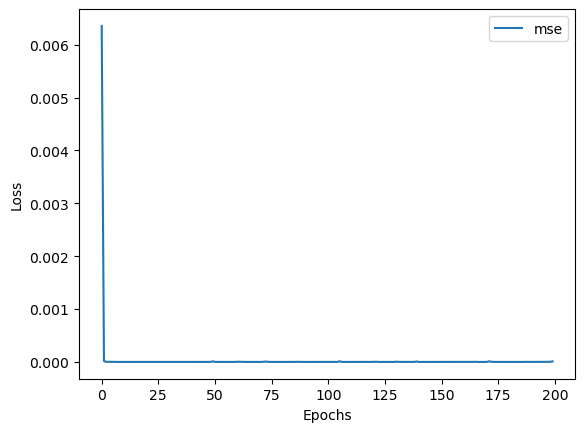

Time Spent for ann_p:  0 minutes 44.84 seconds
Time Spent for ann_r:  0 minutes 44.84 seconds
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step
Training Data - R2 Score: 0.9999982875708834 RMSE: 0.0002542318440755165 MAE: 0.00022246570298744962 MSE: 6.463383054203774e-08
Test Data - R2 Score: 0.999998046091569 RMSE: 0.00025405256318089775 MAE: 0.00021868574010659668 MSE: 6.454270485878406e-08


In [4]:

#Computational time cost 
start_time_ann_p = time.time()
start_time_ann_r = time.time()


def ann_model(): 
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1,)),  
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.Dense(1, activation='sigmoid') # 
        tf.keras.layers.Dense(1, activation='linear')
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mse']) 
    
    history = model.fit(
        train_data, train_data,  
        epochs=200,  
        validation_data=(test_data, test_data),  # Validation set
        verbose=1
    )
    
    return model, history

    

model, history = ann_model() 

pred = model.predict(datainf)



# learning curve plots
df = pd.DataFrame(history.history)
plt.plot(list(range(len(df.mse))), df.mse, label='mse')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


end_time_ann_p = time.time()
end_time_ann_r = time.time()
process_time_ann_p = end_time_ann_p - start_time_ann_p
process_time_ann_r = end_time_ann_r - start_time_ann_r
minute_ann_p = process_time_ann_p // 60 
minute_ann_r = process_time_ann_r // 60
second_ann_p = process_time_ann_p % 60 
second_ann_r = process_time_ann_r % 60 


#print process_time_ANN
print('Time Spent for ann_p: ', round(minute_ann_p), 'minutes', round(second_ann_p,3), 'seconds')

# forecast 
print('Time Spent for ann_r: ', round(minute_ann_r), 'minutes', round(second_ann_r,3), 'seconds')

# Performance Metrics Evaluation for Prediction
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

## print prediction time results
r2_train = r2_score(train_data, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_data, train_predictions))
ann_mae_train = mean_absolute_error(train_data, train_predictions)
mse_train = mean_squared_error(train_data, train_predictions)

## print forecasting time results
r2_test = r2_score(test_data, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))
ann_mae_test = mean_absolute_error(test_data, test_predictions)
mse_test = mean_squared_error(test_data, test_predictions)


## Print prediction  results
print("Training Data - R2 Score:", r2_train, "RMSE:", rmse_train, "MAE:", ann_mae_train, "MSE:", mse_train)


## forecasting results
print("Test Data - R2 Score:", r2_test, "RMSE:", rmse_test,"MAE:", ann_mae_test, "MSE:", mse_test)



#### ARIMA Plots

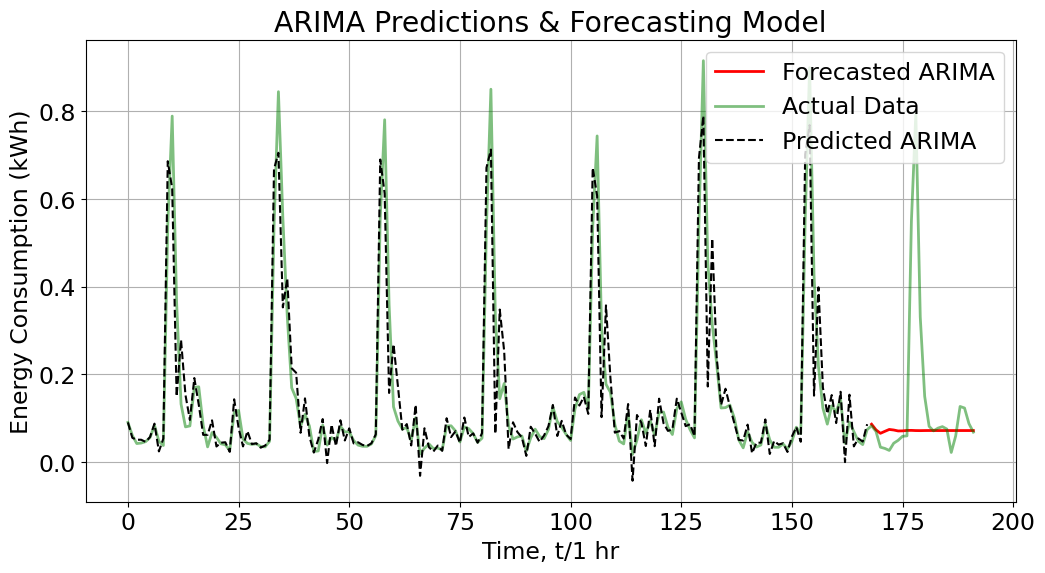

In [13]:
# Plotting All ARIMA Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'r', label='Forecasted ARIMA', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual Data', alpha=0.5, linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'black', label='Predicted ARIMA', linestyle='--')
plt.title('ARIMA Predictions & Forecasting Model')
plt.xlabel('Time, t/1 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
#plt.savefig('sc2_arima.jpg')
plt.show()

#### SVR plots

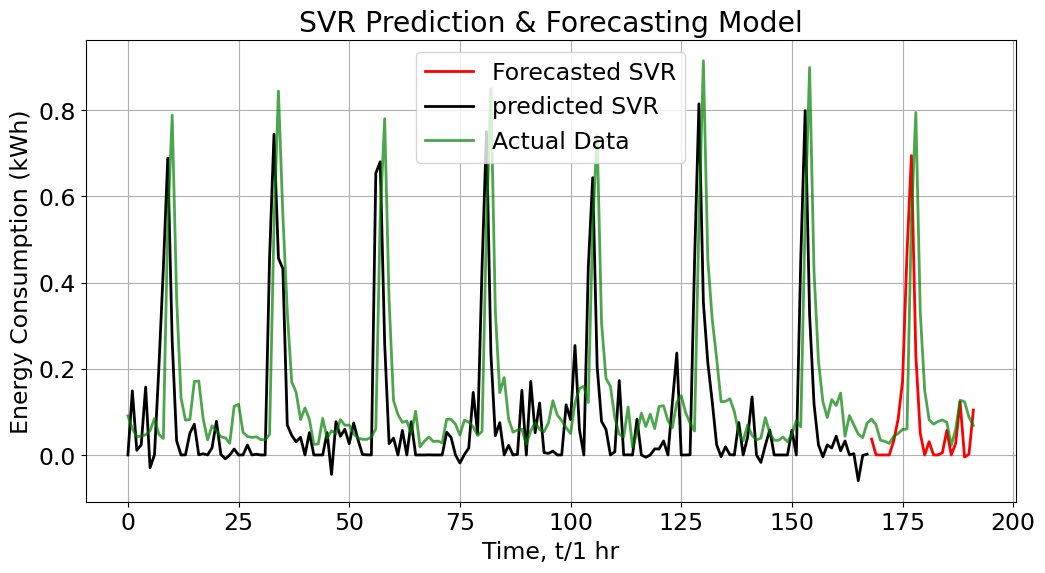

In [14]:
# Plotting SVR Results
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', label='Forecasted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day)), past_predictions, 'black', label='predicted SVR', linewidth=2)
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual Data', alpha=0.7, linewidth=2)
plt.xlabel('Time, t/1 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('SVR Prediction & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc2_svr.jpg')
plt.show()

#### ANN Model

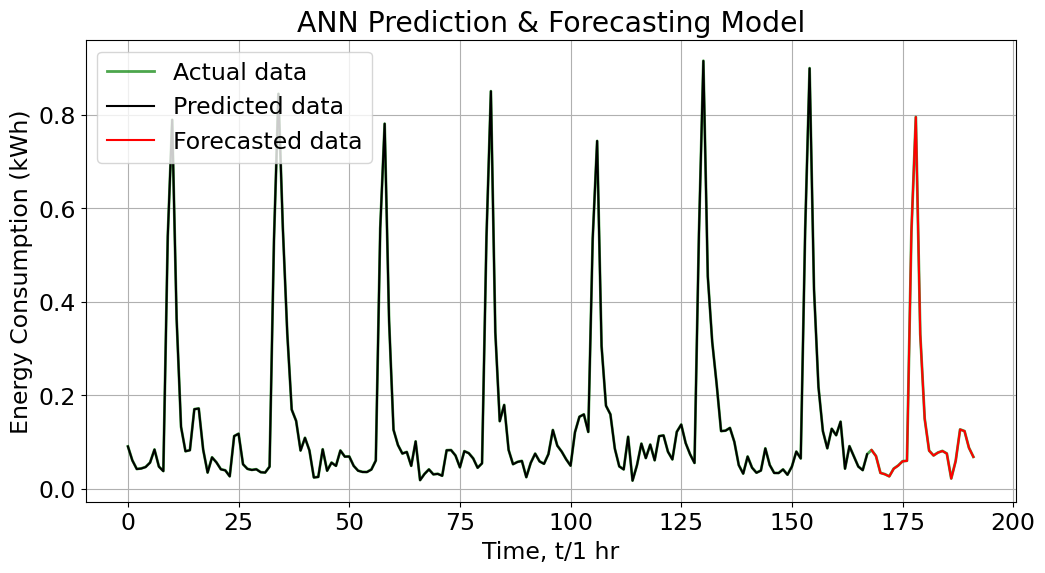

In [6]:
# Plotting ANN Trained, Prediction & Forecast
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)
plt.plot(range(0, total_time_len_day), pred[:total_time_len_day], 'black', linestyle='-', label='Predicted data')
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'r', label='Forecasted data')
plt.xlabel('Time, t/1 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.title('ANN Prediction & Forecasting Model')
plt.legend()
plt.grid(True)
#plt.savefig('sc2_ann.jpg')
plt.show()


### Comparison of ARIMA, ANN & SVR model results Visualisation 

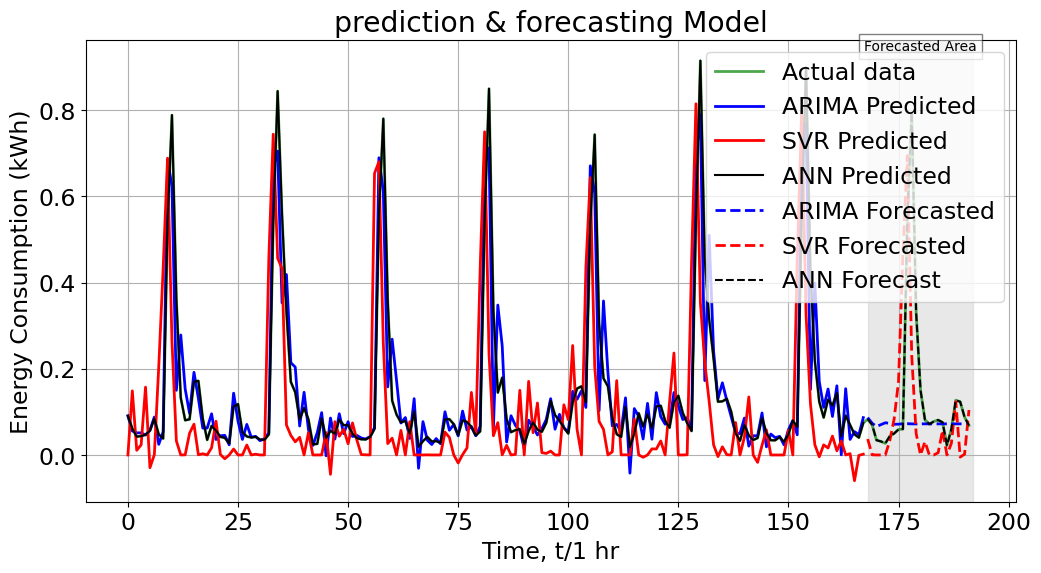

In [17]:
# Plotting All Results comparison 
# Plotting All Results predictions
rc('font', **{'size' : 17})
plt.figure(figsize=(12, 6))
plt.plot(list(range(total_time_len_day + length_of_predict)), actual, 'g', label='Actual data', alpha=0.7, linewidth=2)

# prediction plots
plt.plot(range(len(datainf[:total_time_len_day])), predict, 'blue', label='ARIMA Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), past_predictions, 'r', label='SVR Predicted', linewidth=2)
plt.plot(range(len(datainf[:total_time_len_day])), pred[:total_time_len_day], 'black', linestyle='-', label='ANN Predicted')

#forecasting plots
plt.plot(list(range(total_time_len_day,total_time_len_day + length_of_predict)), forecast, 'blue', linestyle='--', label='ARIMA Forecasted', linewidth=2)
plt.plot(list(range(total_time_len_day, total_time_len_day + length_of_predict)), resout, 'r', linestyle='--', label='SVR Forecasted', linewidth=2)
plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', linestyle='--', label='ANN Forecast')
plt.axvspan(total_time_len_day, total_time_len_day + length_of_predict, color='lightgray', alpha=0.5)
x_position = total_time_len_day + (length_of_predict / 2)  
y_position = plt.ylim()[1] 
plt.text(x_position, y_position, 'Forecasted Area', ha='center', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.title('prediction & forecasting Model')
plt.xlabel('Time, t/1 hr')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.show()







In [11]:
# Plotting All Results
#plt.figure(figsize=(12, 6))
#plt.plot(range(total_time_len_day, total_time_len_day+length_of_predict), pred[total_time_len_day:total_time_len_day+length_of_predict], 'black', label='ANN Forecasted')
#plt.plot(forecast_data.index[total_time_len_day:total_time_len_day + length_of_predict], forecast, 'b', label='Forecast ARIMA', linewidth=2)
#plt.plot(range(total_time_len_day, total_time_len_day + length_of_predict), resout, 'r', label='Forecasted SVR', linewidth=2)
#plt.plot(range(total_time_len_day, total_time_len_day + length_of_predict), actual, 'g', label='Forecasted SVR', linewidth=2)
#plt.title('EWB Hot Water')
#plt.xlabel('Time (Hour)')
#plt.ylabel('Hot water Consumed (flowrate)')
#plt.legend()
#plt.grid(True)
#plt.show()


In [9]:
!pip freeze > requirements.txt
